In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [3]:
text_df = pd.read_csv("Datasets/twcs.csv", encoding = "utf-8", low_memory=False)
text_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [4]:
text_df[text_df["text"].isna()]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id


In [5]:
#merge query tweets and response tweets
initial_inbound = text_df[pd.isnull(text_df["in_response_to_tweet_id"]) & text_df["inbound"]]
query_response = pd.merge(initial_inbound, text_df, left_on='tweet_id', right_on='in_response_to_tweet_id')
query_response = query_response[query_response["inbound_y"] != True]
print(query_response.shape)
query_response.head()

(794299, 14)


,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


In [6]:
query_response = query_response[["author_id_x","created_at_x","text_x","author_id_y","created_at_y","text_y"]]
query_response.head()

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...
1,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...
3,115713,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...


In [7]:
count = query_response.groupby("author_id_y")["text_x"].count()
count

author_id_y
ATT                 1677
ATVIAssist         10279
AWSSupport           764
AdobeCare           5288
AirAsiaSupport      7058
                   ...  
mediatemplehelp      190
nationalrailenq     1938
sainsburys         10763
sizehelpteam        1237
sprintcare         12649
Name: text_x, Length: 108, dtype: int64

<Axes: ylabel='author_id_y'>

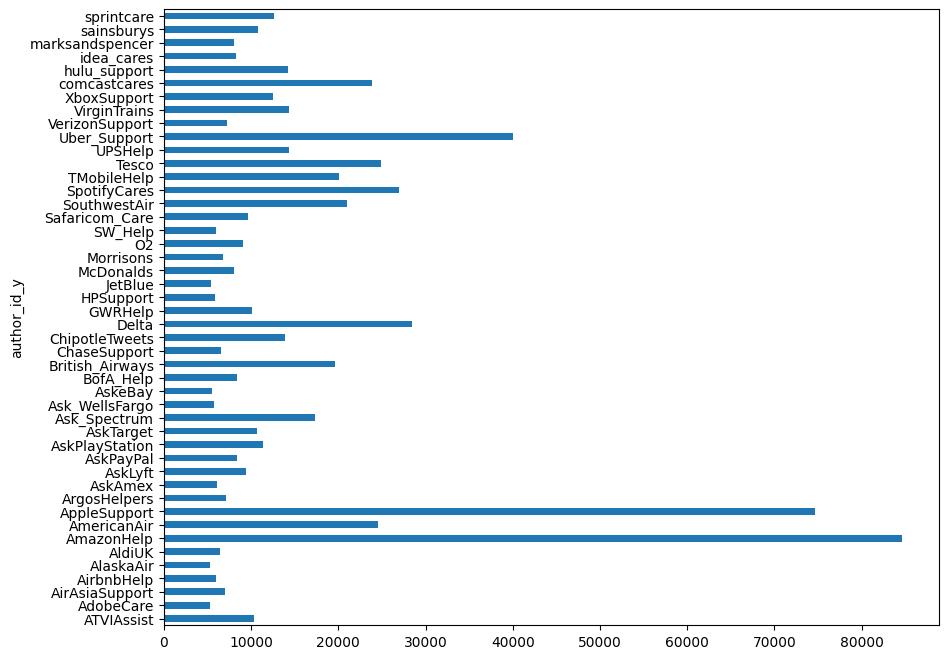

In [8]:
plt.figure(figsize=(30,30))
count[count>5000].plot(kind = "barh", figsize=(10, 8))

In [9]:
#retain only queries to tech related companies
query_response_tech = query_response.loc[query_response["author_id_y"].isin(["sprintcare", "hulusupport", "comcastcares", "XboxSupport", "VerizonSupport", "TMobileHelp", "SpotifyCares", "MicrosoftHelps", "HPSupport", "DellCares", "AzureSupport", "AWSSupport", "Ask_Spectrum", "AskPlayStation", "AskPayPal", "AppleSupport", "AmazonHelp", "AdobeCare", "ATVIAssist"])]
print(query_response_tech.shape)

(332958, 6)


In [10]:
query_response_tech.to_csv("query_response_tech.csv", index = False)

In [11]:
def remove_tags(text):
    return ' '.join(word for word in str(text).split() if not word.startswith("@") and not word.startswith(".@"))

In [12]:
#remove @ tags
query_response_tech["text_x"] = query_response_tech["text_x"].apply(lambda text: remove_tags(text))
query_response_tech["text_y"] = query_response_tech["text_y"].apply(lambda text: remove_tags(text))
query_response_tech.head(20)

C:\Users\waiho\AppData\Local\Temp\ipykernel_1720\1691785163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_response_tech["text_x"] = query_response_tech["text_x"].apply(lambda text: remove_tags(text))
C:\Users\waiho\AppData\Local\Temp\ipykernel_1720\1691785163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_response_tech["text_y"] = query_response_tech["text_y"].apply(lambda text: remove_tags(text))


,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,"Can you please send us a private message, so t..."
1,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,I would love the chance to review the account ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,Hello! We never like our customers to feel lik...
3,115713,Tue Oct 31 19:56:01 +0000 2017,y’all lie about your “great” connection. 5 bar...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,H there! We'd definitely like to work with you...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"whenever I contact customer support, they tell...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,Please send me a private message so that I can...
5,115716,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,Ask_Spectrum,Tue Oct 31 22:05:37 +0000 2017,The information pertaining to the account assu...
6,115717,Tue Oct 31 22:06:54 +0000 2017,Yo your customer service reps are super nice— ...,Ask_Spectrum,Tue Oct 31 22:12:09 +0000 2017,"Hello, My apologies for any frustrations or in..."
7,115718,Tue Oct 31 22:06:56 +0000 2017,My picture on pretty much every day. Why shoul...,Ask_Spectrum,Tue Oct 31 22:10:08 +0000 2017,I apologize for the inconvenience. I will be g...
8,115719,Tue Oct 31 22:10:46 +0000 2017,somebody from please help meeeeee 😩😩😩😩 I'm hav...,VerizonSupport,Tue Oct 31 22:13:33 +0000 2017,Help has arrived! We are sorry to see that you...
9,115720,Tue Oct 31 22:12:16 +0000 2017,My friend is without internet we need to play ...,VerizonSupport,Tue Oct 31 22:13:30 +0000 2017,Have your friend message us. ^ACM


In [13]:
import re

def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [14]:
#remove emojis from text
query_response_tech["text_x"] = query_response_tech["text_x"].apply(lambda text: remove_emoji(text))
query_response_tech["text_y"] = query_response_tech["text_y"].apply(lambda text: remove_emoji(text))
query_response_tech.head()

C:\Users\waiho\AppData\Local\Temp\ipykernel_1720\4293051783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_response_tech["text_x"] = query_response_tech["text_x"].apply(lambda text: remove_emoji(text))
C:\Users\waiho\AppData\Local\Temp\ipykernel_1720\4293051783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_response_tech["text_y"] = query_response_tech["text_y"].apply(lambda text: remove_emoji(text))


,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,"Can you please send us a private message, so t..."
1,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,I would love the chance to review the account ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,Hello! We never like our customers to feel lik...
3,115713,Tue Oct 31 19:56:01 +0000 2017,y’all lie about your “great” connection. 5 bar...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,H there! We'd definitely like to work with you...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"whenever I contact customer support, they tell...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,Please send me a private message so that I can...


In [15]:
def remove_name(text):
    return re.sub("[/\-^*]\w+\s*\Z", "", text)

In [16]:
#remove names from text
query_response_tech["text_x"] = query_response_tech["text_x"].apply(lambda text: remove_name(text))
query_response_tech["text_y"] = query_response_tech["text_y"].apply(lambda text: remove_name(text))
query_response_tech.head()

C:\Users\waiho\AppData\Local\Temp\ipykernel_1720\1223824581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_response_tech["text_x"] = query_response_tech["text_x"].apply(lambda text: remove_name(text))
C:\Users\waiho\AppData\Local\Temp\ipykernel_1720\1223824581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_response_tech["text_y"] = query_response_tech["text_y"].apply(lambda text: remove_name(text))


,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,"Can you please send us a private message, so t..."
1,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,I would love the chance to review the account ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,Hello! We never like our customers to feel lik...
3,115713,Tue Oct 31 19:56:01 +0000 2017,y’all lie about your “great” connection. 5 bar...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,H there! We'd definitely like to work with you...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"whenever I contact customer support, they tell...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,Please send me a private message so that I can...


In [17]:
#remove responses where customer support asks customer to DM them for help
query_response_tech = query_response_tech[~query_response_tech["text_y"].str.contains("DM")]

In [18]:
#remove rows with empty text
query_response_tech = query_response_tech[query_response_tech["text_x"] != ""]
query_response_tech = query_response_tech[query_response_tech["text_y"] != ""]
query_response_tech = query_response_tech[query_response_tech["text_x"].str.isspace() == False]
query_response_tech = query_response_tech[query_response_tech["text_y"].str.isspace() == False]

In [19]:
query_response_tech.shape

(219762, 6)

In [21]:
query_response_tech.to_csv("Datasets/query_response_tech_cleaned.csv", index = False)